In [1]:
#I saved the test version of this in rv_quiet_LCs. Now I am rewriting to do 
# the analysis I want on all of the stars
import glob
import numpy as np
import astropy.io.fits as fits
from astropy import units as u

%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages

from lightkurve import TessTargetPixelFile
from lightkurve import TessLightCurveFile
from lightkurve import periodogram 

from astropy import constants as const

In [ ]:
nu_max = 274.5
T_eff = 3796.11
nu_max_sol = 3140.
T_sol = 5777.
g_sun = const.G.cgs*const.M_sun.cgs/(const.R_sun.cgs)**2



In [107]:
lcf = TessLightCurveFile.from_fits('tess2018206045859-s0001-0000000232074535-0120-s_lc.fits')

/Users/jcarlberg/miniconda3/envs/astroconda/lib/python3.5/site-packages/lightkurve/lightcurvefile.py:85: LightkurveWarning: `LightCurveFile.from_fits()` is deprecated and will be removed soon, please use `lightkurve.open()` instead.
  LightkurveWarning)


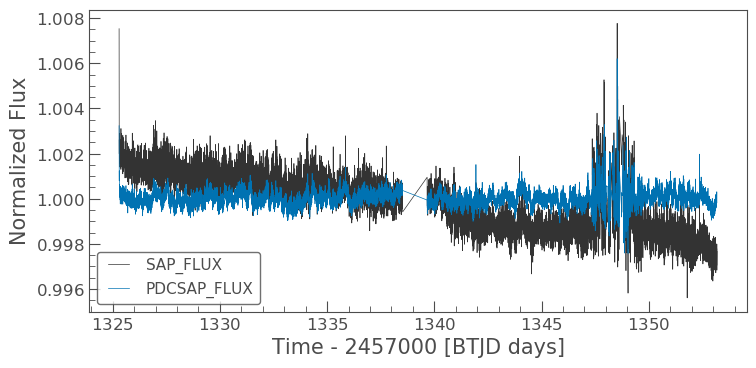

In [108]:
lcf.plot()

In [111]:
my_mask = np.copy(lcf.quality_mask)

In [114]:
lc = lcf.SAP_FLUX

In [134]:
new_lc = lc[(lc.time < 1347) | (lc.time > 1350)]

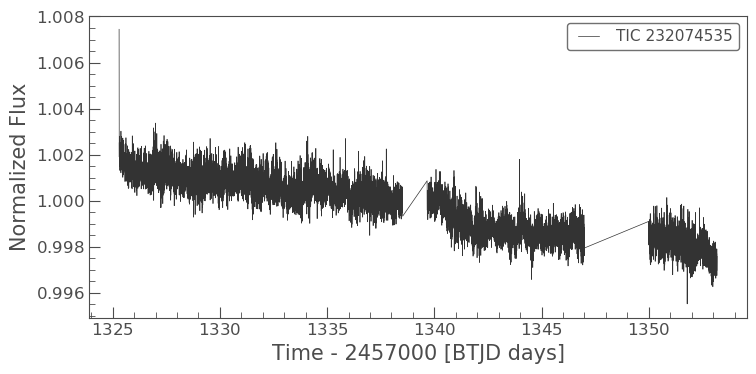

In [135]:
new_lc.plot()

In [146]:
per2=lc.remove_nans().fill_gaps().to_periodogram(minimum_period=5*u.minute,oversample_factor=10,normalization='amplitude')
per3=lc.remove_nans().fill_gaps().to_periodogram(minimum_period=5*u.minute,oversample_factor=10,normalization='psd')

(1, 10000.0)

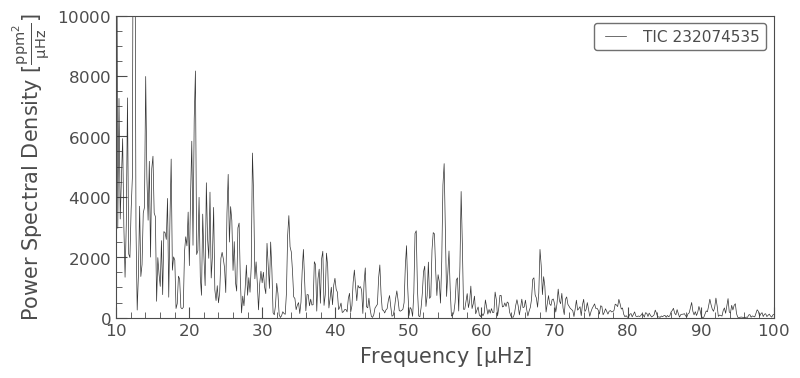

In [171]:
#per2.plot(unit=u.microHertz,scale='linear')
#plt.xlim(10,100)
#plt.ylim(1,100)
per3.bin(binsize=4).plot(unit=u.microHertz,scale='linear')
plt.xlim(10,100)
plt.ylim(1,1e4)
#plt.vlines([56,70,100],0,10000)

In [175]:
def logg_to_nu_max(logg,temp):
    g_obs = 10**logg
    nu_max_exp2 = nu_max_sol*g_obs/g_sun.value * np.sqrt(T_sol/temp)
    return nu_max_exp2



In [187]:
def nu_max_to_logg(nu_max,temp):
    g_obs = g_sun.value*(nu_max/nu_max_sol)*np.sqrt(temp/T_sol)
    return np.log10(g_obs)

In [192]:
print(logg_to_nu_max(2.91, 5067)) #Exoplanets.org value
print(logg_to_nu_max(2.76, 4980)) # Our values


print(nu_max_to_logg(56.0, 5067)) # exoplanet's.org temp
print(nu_max_to_logg(56.0, 4980))# using our temp

99.38886987852419
70.97387759322397
2.660850274610748
2.6570894938452714
